In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


__OBSERVATION__ 

There are 1000rows and 8features

Features are:\
1)gender\
2)race/ethnicity\
3)parental level of education\
4)lunch\
5)test preparation course\
6)math score\
7)reading score\
8)writing score

__CHECK IF THERE IS ANY NULL VALUES__

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

it seems thats there are no null values!!

__CHECK IF THERE ARE ANY DUPLICATE VALUES__

In [10]:
df.duplicated().sum()

np.int64(0)

It seems that there are no duplicate values either!!

__CHECK THE NUMBER OF UNIQUE VALUES FOR EACH COLUMNS__

In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

__LETS CHECK THE DISTRIBUTION OF GENDER IN THE DATSET__

In [12]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

We can say that the distribution between male/females are evenly distributed

__CHECKING THE STATASTICS OF THE DATA__

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


__LETS CHECK THE NUMBER OF STUDENTS WHO HAVE SCORED 100 MARKS IN EACH SUBJECT__

In [19]:
df[df['math score']==100]['math score'].count()

np.int64(7)

In [20]:
df[df['reading score']==100]['reading score'].count()

np.int64(17)

In [21]:
df[df['writing score']==100]['writing score'].count()

np.int64(14)

__LETS CHECH THOSE STUDENTS WHO HAVE SCORED LESS THAN 20 IN EACH SUBJECT__

In [22]:
df[df['math score']<20]['math score'].count()

np.int64(4)

In [25]:
df[df['reading score']<20]['reading score'].count()

np.int64(1)

In [26]:
df[df['writing score']<20]['writing score'].count()

np.int64(3)

__CHECKING THE DIFFRENT CATAGARIES IN THE FEATURES__

In [27]:
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [34]:
print("Gender:",end=" ")
print(df['gender'].unique())
print()
print("race/ethnicity	:",end=" ")
print(df['race/ethnicity'].unique())
print()
print("parental level of education	:",end=" ")
print(df['parental level of education'].unique())
print()
print("lunch:",end=" ")
print(df['lunch'].unique())
print()
print("test preparation course:",end=" ")
print(df['test preparation course'].unique())


Gender: ['female' 'male']

race/ethnicity	: ['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education	: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: ['standard' 'free/reduced']

test preparation course: ['none' 'completed']


__CHECKING THE NUMBER OF CATEGORICAL AND NUMBERICAL VARIABLES__

In [37]:
df.columns.values

array(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'], dtype=object)

In [45]:
numerical=[]
numerical=[feature for feature in df.columns if df[feature].dtype!='O' ]
print('The number of numerical values {} \
      The features are {}'.format(len(numerical),numerical))

print()

categorical=[]
categorical=[feature for feature in df.columns if df[feature].dtype=='O' ]
print('The number of categorical values {} \
      The features are {}'.format(len(categorical),categorical))

The number of numerical values 3       The features are ['math score', 'reading score', 'writing score']

The number of categorical values 5       The features are ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


__ADD COLUMNS FOR TOTAL AND AVERAGE__

In [46]:
df['total marks']=df['math score']+df['reading score']+df['writing score']
df['average']=df['total marks']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total marks,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


__PLOTING HISTOGRAM FOR ANALYSIS__

<Axes: xlabel='total marks', ylabel='Count'>

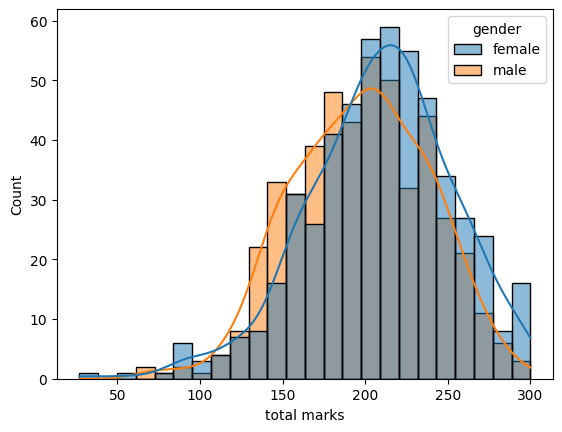

In [47]:
sns.histplot(x='total marks',data=df,hue='gender',kde=True)

From the above histogram we can clearly observe that females perform better than male

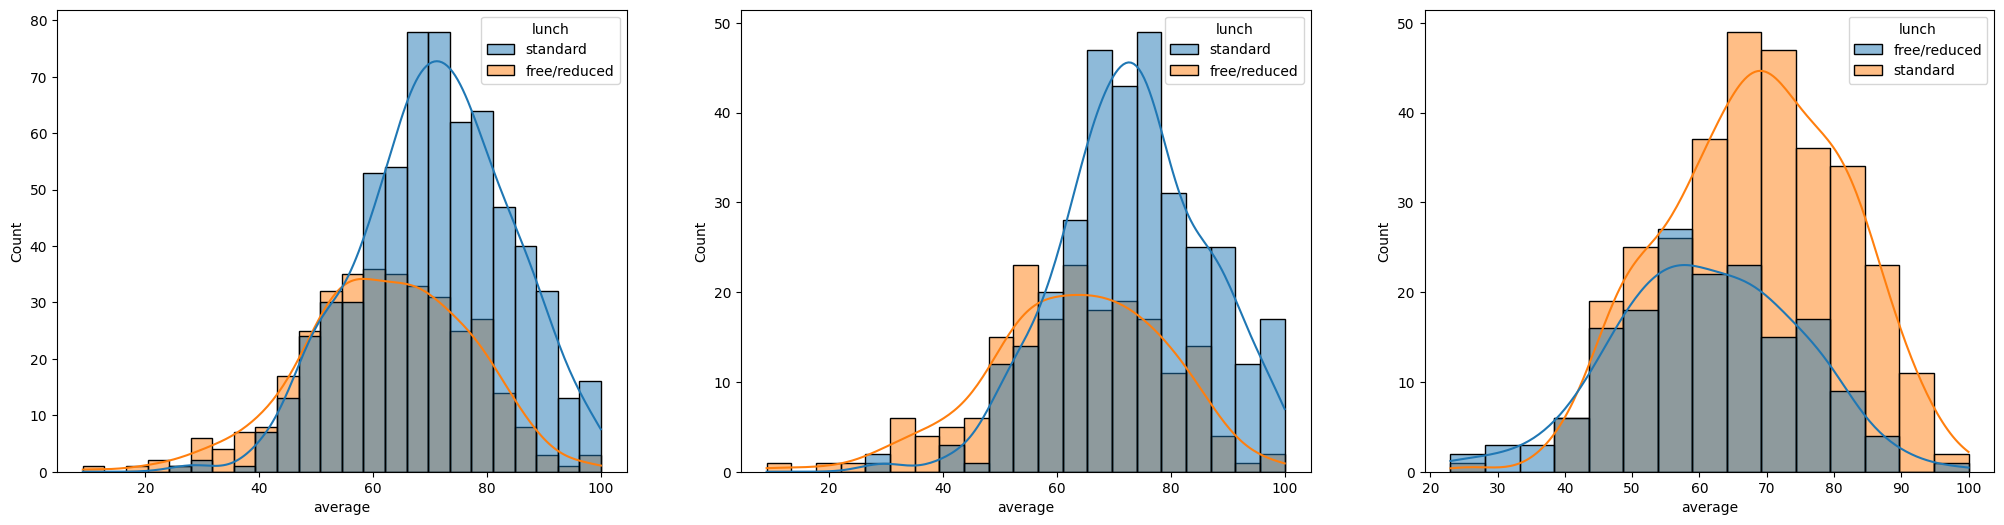

In [66]:
# Create a figure and a 1x3 grid of subplots, with specified figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (1st column)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second subplot (2nd column) for female students
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

# Third subplot (3rd column) for male students
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

# Show the plots
plt.show()


Having a standard lunch helps in scoring good marks

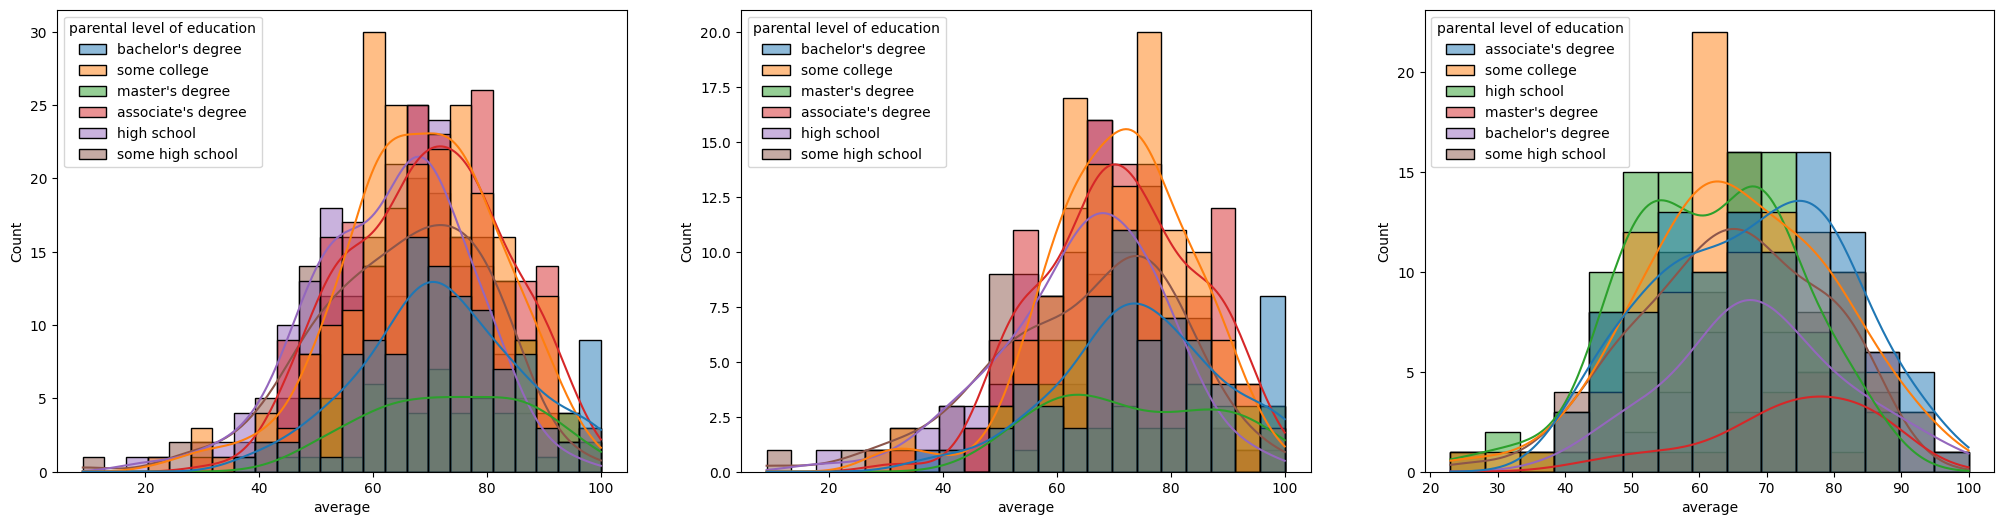

In [67]:
# Create a figure and a 1x3 grid of subplots, with specified figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (1st column)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

# Second subplot (2nd column) for female students
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')

# Third subplot (3rd column) for male students
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

# Show the plots
plt.show()


1)It seems that students whose parents have a masters degree tend to score better marks\
2)It seems that students whose parents have a some college tend to score average marks

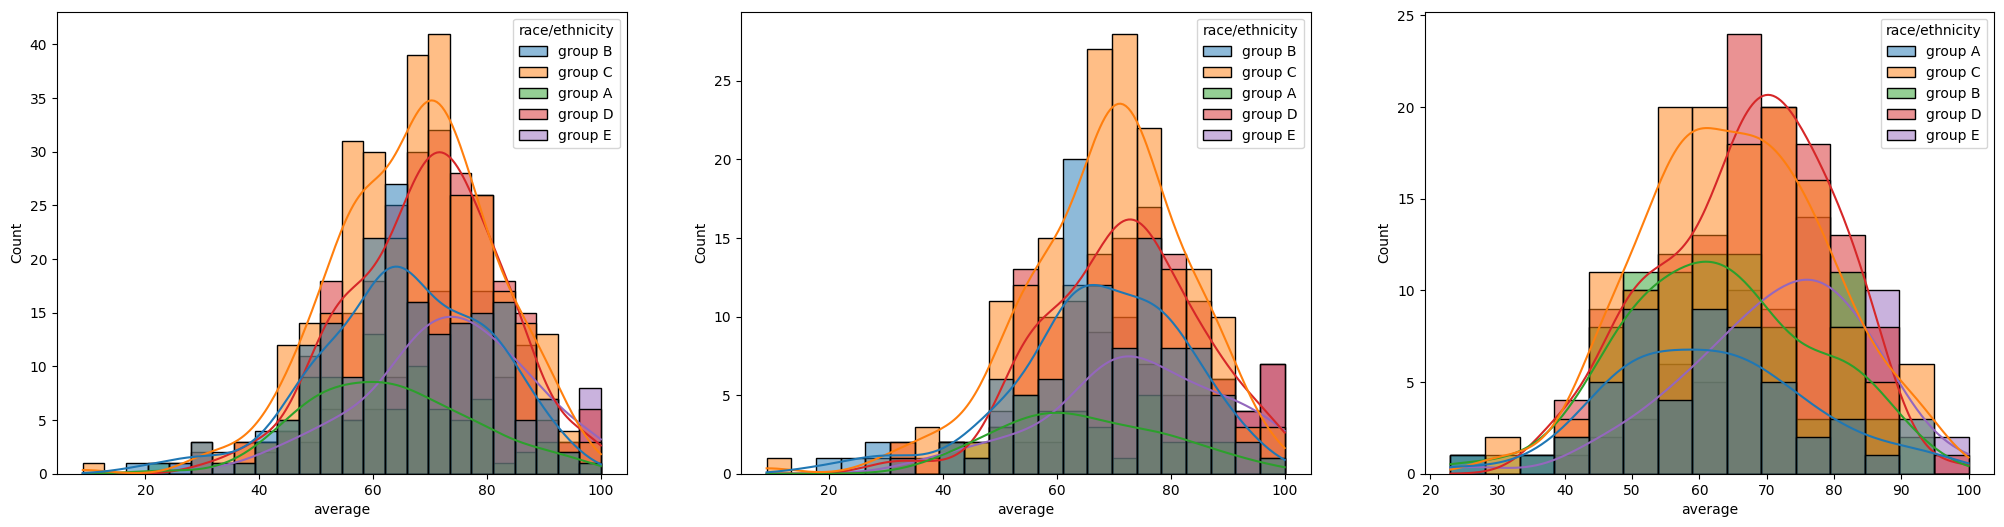

In [68]:
# Create a figure and a 1x3 grid of subplots, with specified figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (1st column)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')

# Second subplot (2nd column) for female students
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')

# Third subplot (3rd column) for male students
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')

# Show the plots
plt.show()


1)Group E race students score better marks when we compare to other group\
2)Group C and A race students have a better average

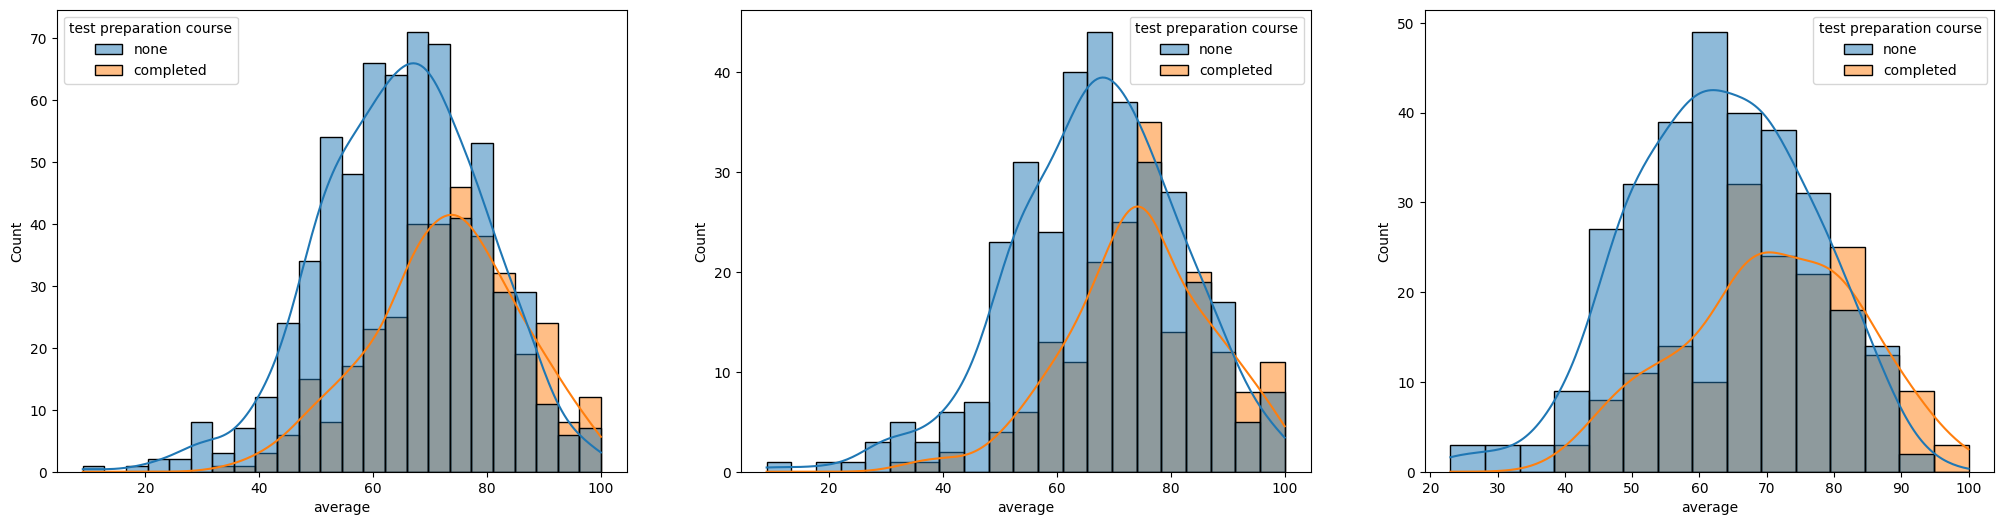

In [69]:
# Create a figure and a 1x3 grid of subplots, with specified figure size
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (1st column)
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', kde=True, hue='test preparation course')

# Second subplot (2nd column) for female students
plt.subplot(1, 3, 2)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='test preparation course')

# Third subplot (3rd column) for male students
plt.subplot(1, 3, 3)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='test preparation course')

# Show the plots
plt.show()


1)Students who have completed test preperation score have an upper hand of scoring higher marks\
2)Students who have not completed test preperation score tend to score average marks

__PIE CHART ANALYSIS__

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

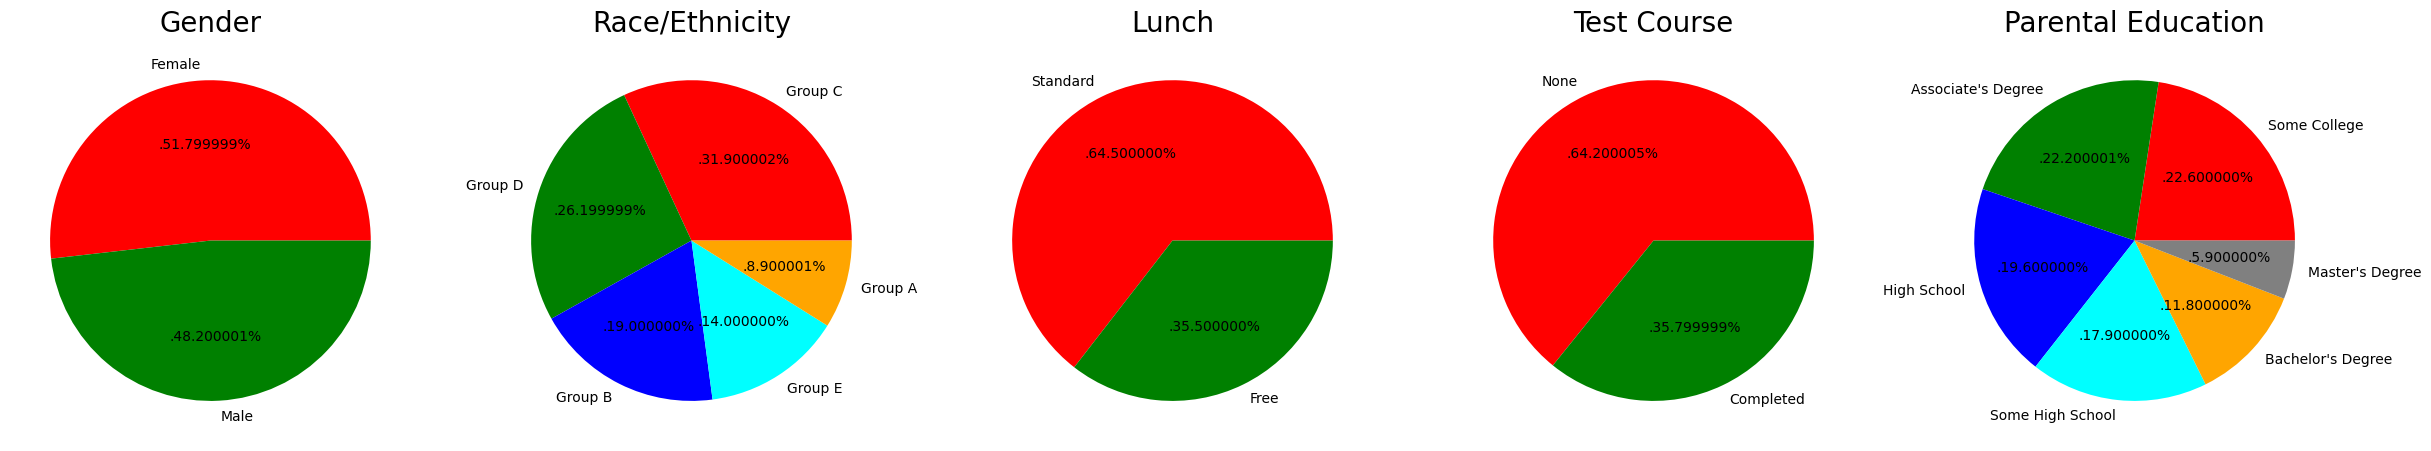

In [77]:
fig, axes = plt.subplots(1, 5, figsize=(30, 30))

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


Number of Male and Female students is almost equal\
Number students are greatest in Group C\
Number of students who have standard lunch are greater\
Number of students who have not enrolled in any test preparation course is greater\
Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"